In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import metrics
from scipy import stats

In [2]:
Test = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test-1542969243754.csv")
Test_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Inpatientdata-1542969243754.csv")
Test_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Test_Outpatientdata-1542969243754.csv")

Train = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train-1542865627584.csv")
Train_Beneficiary = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Inpatientdata-1542865627584.csv")
Train_Outpatient = pd.read_csv("C:/Users/teren/Documents/GitHub/Healthcare Provider Fraud/Data/Train_Outpatientdata-1542865627584.csv")

In [3]:
Train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
Train_Beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
#Create an Age column for the Beneficiary Details
## Lets Create Age column to the dataset
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format='%Y/%m/%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Train_Beneficiary['Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format='%Y/%m/%d')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'], format='%Y/%m/%d',errors='ignore')
Test_Beneficiary['Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB'])/ np.timedelta64(1, 'Y')))

In [8]:
## We see that the last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.
Train_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y/%m/%d') - Train_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

Test_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y/%m/%d') - Test_Beneficiary['DOB']))/ np.timedelta64(1, 'Y')),
                                 inplace=True)

In [9]:
Train_Beneficiary.head(5)
Test_Beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,2,1,1,2,0,0,1490,160,69.0
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,2,2,0,0,1170,660,73.0
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,...,1,2,2,1,1,5000,1068,250,320,96.0
4,BENE11014,1938-04-01,NaT,2,1,Y,45,780,12,12,...,2,1,2,2,2,21260,2136,120,100,72.0


In [10]:
#Lets create a new variable 'Dead' with flag 1 means Dead and 0 means not Dead
Train_Beneficiary.loc[Train_Beneficiary.DOD.isna(),'Dead']=0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(),'Dead']=1

Test_Beneficiary.loc[Test_Beneficiary.DOD.isna(),'Dead']=0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(),'Dead']=1

In [11]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format='%Y/%m/%d')
Train_Inpatient['AdmitForDays'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format='%Y/%m/%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format='%Y/%m/%d')
Test_Inpatient['AdmitForDays'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1

In [12]:
#We will eventually combine inpatient and outpatient incurance claims, but we still want to make a distinction between the two.
#The new merged table will include a Patient Type column. 0 = Outpatient and 1 = Inpatient.
Train_Outpatient['PatientType'] = 0
Train_Inpatient['PatientType'] = 1

Test_Outpatient['PatientType'] = 0
Test_Inpatient['PatientType'] = 1

In [13]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatient.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatient.AdmitForDays.max())
Train_Inpatient.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatient.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatient.AdmitForDays.max())
Test_Inpatient.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [14]:
## Combine inpatient and outpatient claims data
Train_Allpatient = Train_Inpatient.append(Train_Outpatient, sort=False)
Test_Allpatient = Test_Inpatient.append(Test_Outpatient, sort=False)

In [15]:
print('Train_Allpatientdata',Train_Allpatient.shape)
print('Test_Allpatientdata',Test_Allpatient.shape)

Train_Allpatientdata (558211, 32)
Test_Allpatientdata (135392, 32)


In [16]:
pd.set_option('display.max_columns', None)
Train_Allpatient.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,PatientType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9.0,1


In [17]:
#Combine Beneficiary Data with Insurance Claims data
Train_AllPatientDetails = pd.merge(Train_Allpatient, Train_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])
Test_AllPatientDetails = pd.merge(Test_Allpatient, Test_Beneficiary, how='inner', left_on = ['BeneID'], right_on = ['BeneID'])

In [18]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetails.shape)
print('Shape of All Patient Details Test : ',Test_AllPatientDetails.shape)
Test_AllPatientDetails.head(2)

Shape of All Patient Details Train :  (558211, 58)
Shape of All Patient Details Test :  (135392, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,PatientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,8.0,1,1938-04-01,NaT,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,72.0,0.0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaT,NaN,0.0,NaT,NaN,73721,7224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1938-04-01,NaT,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,72.0,0.0


In [19]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join
Train_ProviderWithPatientDetails=pd.merge(Train,Train_AllPatientDetails,on='Provider')
Test_ProviderWithPatientDetails=pd.merge(Test,Test_AllPatientDetails,on='Provider')

In [20]:
Train_ProviderWithPatientDetails.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                

In [21]:
Test_ProviderWithPatientDetails.isnull().sum()

Provider                                0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                    347
OperatingPhysician                 108199
OtherPhysician                      86760
AdmissionDt                        125841
ClmAdmitDiagnosisCode              100036
DeductibleAmtPaid                     196
DischargeDt                        125841
DiagnosisGroupCode                 125841
ClmDiagnosisCode_1                   2578
ClmDiagnosisCode_2                  47785
ClmDiagnosisCode_3                  76744
ClmDiagnosisCode_4                  95775
ClmDiagnosisCode_5                 108594
ClmDiagnosisCode_6                 115232
ClmDiagnosisCode_7                 119607
ClmDiagnosisCode_8                 122670
ClmDiagnosisCode_9                 125516
ClmDiagnosisCode_10               

In [22]:
#Replace null values with 0. The AdmitforDays is null for outpatients data, so we can replace the value with 0.
Train_ProviderWithPatientDetails['DeductibleAmtPaid'] = Train_ProviderWithPatientDetails.DeductibleAmtPaid.fillna(0)
Train_ProviderWithPatientDetails['AdmitForDays'] = Train_ProviderWithPatientDetails.AdmitForDays.fillna(0)

Test_ProviderWithPatientDetails['DeductibleAmtPaid'] = Test_ProviderWithPatientDetails.DeductibleAmtPaid.fillna(0)
Test_ProviderWithPatientDetails['AdmitForDays'] = Test_ProviderWithPatientDetails.AdmitForDays.fillna(0)

In [23]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetails.shape)

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetails.shape)
Test_ProviderWithPatientDetails.head(2)

Shape of Train Provider with Patient Details data :- (558211, 59)
Shape of Test Provider with Patient Details data :- (135392, 58)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,PatientType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Dead
0,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,NaT,78060,0.0,NaT,NaN,7840,V4502,2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1921-02-01,NaT,2,1,0,1,100,0,12,2,1,1,2,1,1,1,1,2,2,2,22000,3204,1020,910,89.0,0.0
1,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,NaT,41401,0.0,NaT,NaN,V4581,V173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1921-02-01,NaT,2,1,0,1,100,0,12,2,1,1,2,1,1,1,1,2,2,2,22000,3204,1020,910,89.0,0.0


In [24]:
#Remove Train Dataset Outliers that are 4 standard deviations above
InscClaimAmtReimbursed_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['InscClaimAmtReimbursed'])) > 4)].index
IPAnnualReimbursementAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['IPAnnualReimbursementAmt'])) > 4)].index
IPAnnualDeductibleAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['IPAnnualDeductibleAmt'])) > 4)].index
OPAnnualReimbursementAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['OPAnnualReimbursementAmt'])) > 4)].index
OPAnnualDeductibleAmt_outliers = Train_ProviderWithPatientDetails[(np.abs(stats.zscore(Train_ProviderWithPatientDetails['OPAnnualDeductibleAmt'])) > 4)].index

In [25]:
Train_ProviderWithPatientDetails.drop(InscClaimAmtReimbursed_outliers, inplace = True, errors='ignore')
Train_ProviderWithPatientDetails.drop(IPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
Train_ProviderWithPatientDetails.drop(IPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')
Train_ProviderWithPatientDetails.drop(OPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
Train_ProviderWithPatientDetails.drop(OPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')

In [26]:
#Remove Test Dataset Outliers that are 4 standard deviations above
InscClaimAmtReimbursed_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['InscClaimAmtReimbursed'])) > 4)].index
IPAnnualReimbursementAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['IPAnnualReimbursementAmt'])) > 4)].index
IPAnnualDeductibleAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['IPAnnualDeductibleAmt'])) > 4)].index
OPAnnualReimbursementAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['OPAnnualReimbursementAmt'])) > 4)].index
OPAnnualDeductibleAmt_outliers = Test_ProviderWithPatientDetails[(np.abs(stats.zscore(Test_ProviderWithPatientDetails['OPAnnualDeductibleAmt'])) > 4)].index

In [27]:
Test_ProviderWithPatientDetails.drop(InscClaimAmtReimbursed_outliers, inplace = True, errors='ignore')
Test_ProviderWithPatientDetails.drop(IPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
Test_ProviderWithPatientDetails.drop(IPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')
Test_ProviderWithPatientDetails.drop(OPAnnualReimbursementAmt_outliers, inplace = True, errors='ignore')
Test_ProviderWithPatientDetails.drop(OPAnnualDeductibleAmt_outliers, inplace = True, errors='ignore')

In [28]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetails.shape)

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetails.shape)

Shape of Train Provider with Patient Details data :- (533659, 59)
Shape of Test Provider with Patient Details data :- (129661, 58)


Percent Distribution of Potential Fraud by Claims:- 
 No     62.18
Yes    37.82
Name: PotentialFraud, dtype: float64


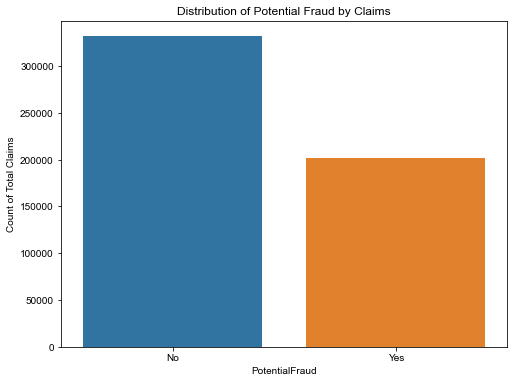

In [29]:
#How many potential fraud claims are happening in total?
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train_ProviderWithPatientDetails)
ax.set_title('Distribution of Potential Fraud by Claims')
ax.set_ylabel('Count of Total Claims')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_total = pd.value_counts(Train_ProviderWithPatientDetails['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud by Claims:- \n",round(count_total*100/len(Train_ProviderWithPatientDetails), 2))
LABELS = ["Non Fraud", "Fraud"]

Percent Distribution of Potential Fraud Providers:- 
 No     90.65
Yes     9.35
Name: PotentialFraud, dtype: float64


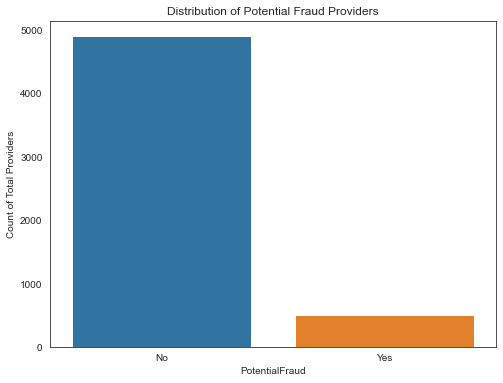

In [30]:
#How many potential fraud provider are there?

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='PotentialFraud', data=Train)
ax.set_title('Distribution of Potential Fraud Providers')
ax.set_ylabel('Count of Total Providers')

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud Providers:- \n",round(count_provider*100/len(Train), 2))
LABELS = ["Non Fraud", "Fraud"]

Text(0, 0.5, 'Count of Total Claims by Providers')

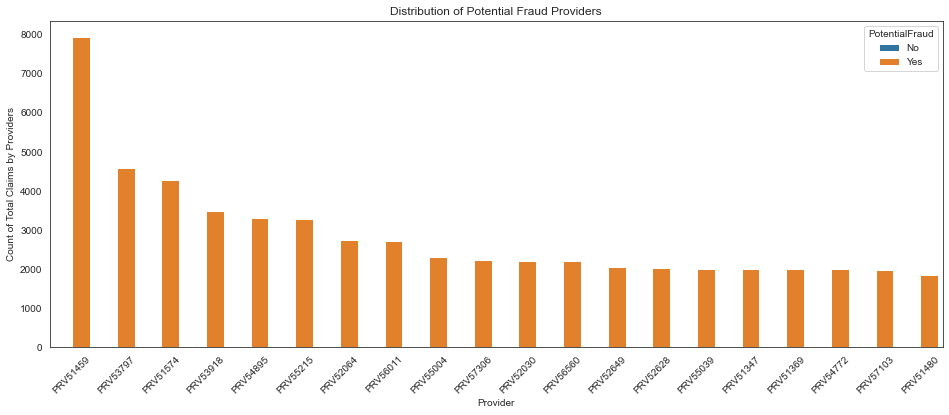

In [31]:
#Top Providers based on total Number of claims
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x='Provider', hue = 'PotentialFraud',  data=Train_ProviderWithPatientDetails              
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
ax.set_title('Distribution of Potential Fraud Providers')
plt.xticks(rotation=45)
ax.set_ylabel('Count of Total Claims by Providers')

In [32]:
#PLotting the frequencies of Age beneficiaries
count_Age = pd.value_counts(Train_Beneficiary['Age'],bins = 20)

#Drawing a barplot
grouped_Age = (count_Age / len(Train_Beneficiary['Age'])).to_frame()
grouped_Age = grouped_Age.reset_index()
grouped_Age = grouped_Age.sort_values('index')

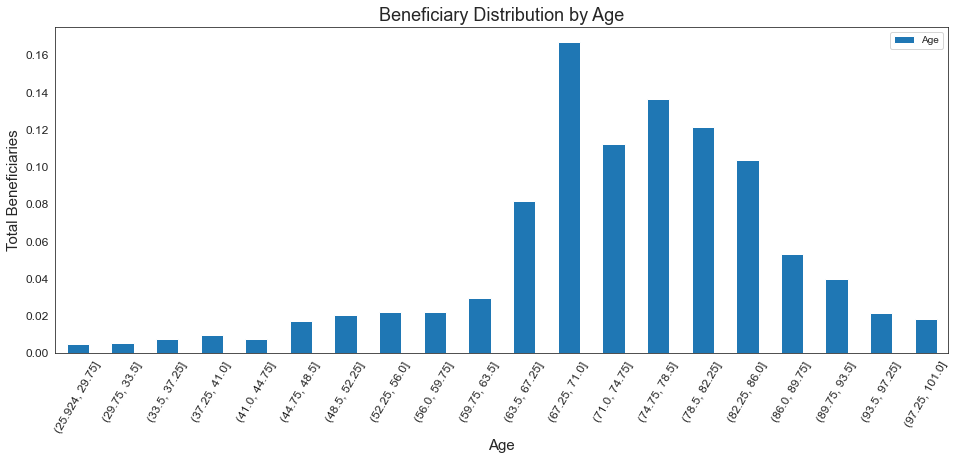

In [33]:
grouped_Age.plot(x = 'index', kind = 'bar', rot = 60, figsize=(16, 6), fontsize = 12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Age",fontsize=18)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Total Beneficiaries",fontsize=15)
plt.show()

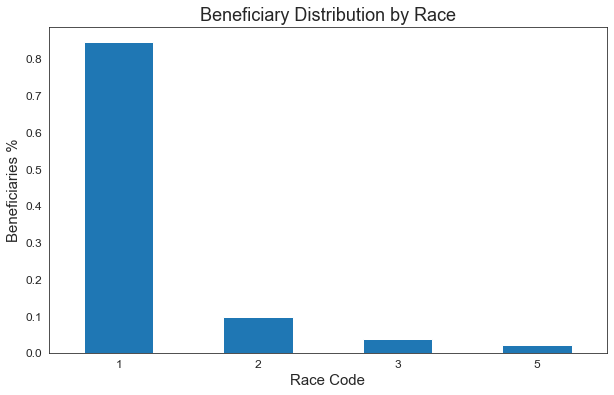

In [34]:
count_Race = pd.value_counts(Train_Beneficiary['Race'], sort = True)

#Drawing a barplot
(count_Race/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Beneficiaries "'%',fontsize=15)
plt.show()


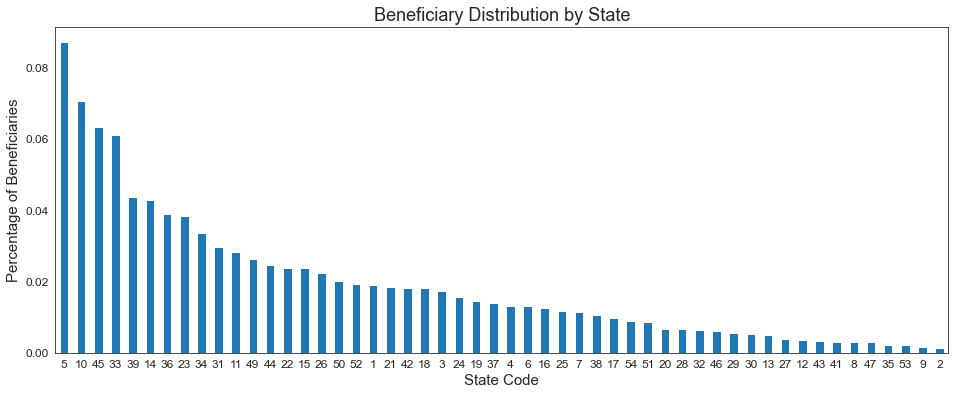

In [35]:
count_State = pd.value_counts(Train_Beneficiary['State'], sort = True)

#Drawing a barplot
(count_State/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by State",fontsize=18)
plt.xlabel("State Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries",fontsize=15)
plt.show()

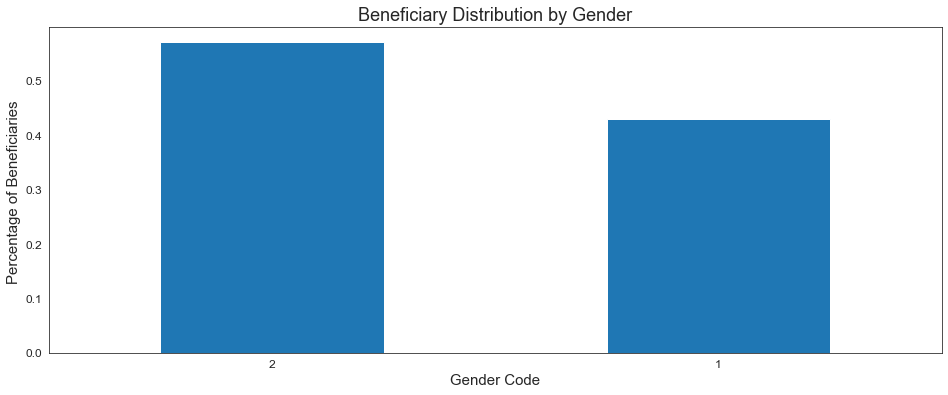

In [36]:
count_Gender = pd.value_counts(Train_Beneficiary['Gender'], sort = True)

## Add Color

#Drawing a barplot
(count_Gender/len(Train_Beneficiary)).plot(kind = 'bar', rot=0,figsize=(16,6),fontsize=12)

#Giving titles and labels to the plot
plt.title("Beneficiary Distribution by Gender",fontsize=18)
plt.xlabel("Gender Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries ",fontsize=15)
plt.show()

In [37]:
#Combine all Claim Procedure codes
Train_Procedures =  pd.DataFrame(columns = ['Procedures'])
Train_Procedures['Procedures'] = pd.concat([Train_ProviderWithPatientDetails['ClmProcedureCode_1'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_2'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_3'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_4'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_5'], 
                                          Train_ProviderWithPatientDetails['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [38]:
grouped_Train_Procedures = Train_Procedures['Procedures'].value_counts()

In [39]:
grouped_Train_Procedures = grouped_Train_Procedures.to_frame()

In [40]:
grouped_Train_Procedures.columns = ['count']

In [41]:
grouped_Train_Procedures['Procedure'] = grouped_Train_Procedures.index
grouped_Train_Procedures['Percentage'] = (grouped_Train_Procedures['count']/sum(grouped_Train_Procedures['count']))*100

In [42]:
#Return Top 20 Procedures
grouped_Train_Procedures = grouped_Train_Procedures.head(20)

In [43]:
grouped_Train_Procedures

,count,Procedure,Percentage
4019.0,1378,4019.0,6.503067
9904.0,1012,9904.0,4.775838
8154.0,880,8154.0,4.152902
2724.0,720,2724.0,3.397829
3893.0,695,3893.0,3.279849
66.0,656,66.0,3.095800
3995.0,634,3995.0,2.991977
4516.0,577,4516.0,2.722983
3722.0,529,3722.0,2.496461
8151.0,397,8151.0,1.873525


Text(0, 0.5, '% of Total Claims')

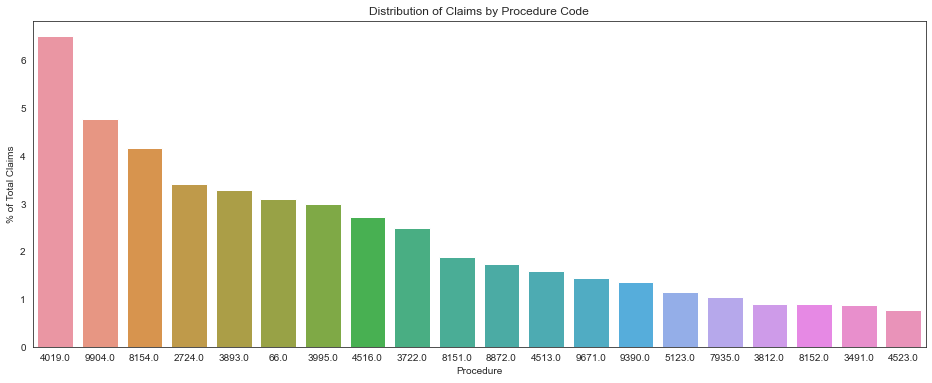

In [44]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Procedure', y = 'Percentage', data=grouped_Train_Procedures, 
            order=grouped_Train_Procedures.sort_values('Percentage',ascending = False).Procedure)
ax.set_title('Distribution of Claims by Procedure Code')
ax.set_ylabel('% of Total Claims')

In [45]:
#Combine all Claim Procedure codes
Train_Diagnosis =  pd.DataFrame(columns = ['Diagnosis'])
Train_Diagnosis['Diagnosis'] = pd.concat([Train_ProviderWithPatientDetails['ClmDiagnosisCode_1'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_2'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_3'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_4'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_5'], 
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_6'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_7'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_8'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_9'],
                                          Train_ProviderWithPatientDetails['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [46]:
grouped_Train_Diagnosis = Train_Diagnosis['Diagnosis'].value_counts()

In [47]:
grouped_Train_Diagnosis = grouped_Train_Diagnosis.to_frame()

In [48]:
grouped_Train_Diagnosis.columns = ['count']

In [49]:
grouped_Train_Diagnosis['Diagnosis'] = grouped_Train_Diagnosis.index
grouped_Train_Diagnosis['Percentage'] = (grouped_Train_Diagnosis['count']/sum(grouped_Train_Diagnosis['count']))*100

In [50]:
#Return Top 20 Procedures
grouped_Train_Diagnosis = grouped_Train_Diagnosis.head(20)

In [51]:
grouped_Train_Diagnosis

,count,Diagnosis,Percentage
4019,73491,4019,4.708230
25000,35150,25000,2.251899
2724,33982,2724,2.177070
V5869,24139,V5869,1.546475
4011,23368,4011,1.497080
V5861,19371,V5861,1.241011
42731,18725,42731,1.199625
2720,17536,2720,1.123451
2449,16665,2449,1.067650
4280,14024,4280,0.898453


Text(0, 0.5, '% of Total Claims')

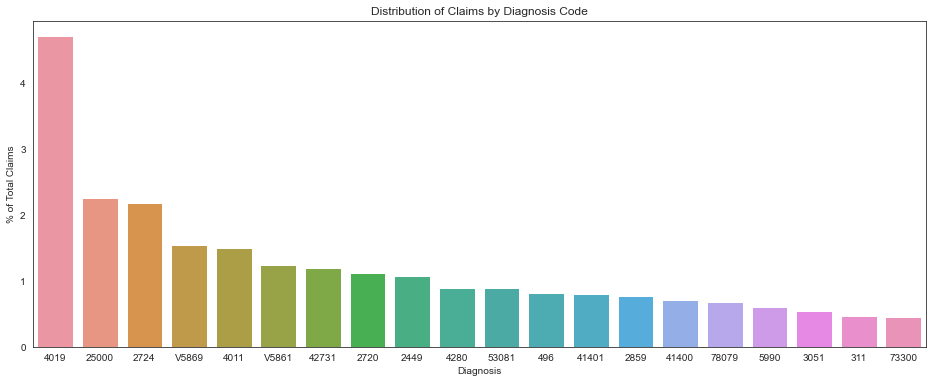

In [52]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Diagnosis', y = 'Percentage', data=grouped_Train_Diagnosis, 
            order=grouped_Train_Diagnosis.sort_values('Percentage',ascending = False).Diagnosis)
ax.set_title('Distribution of Claims by Diagnosis Code')
ax.set_ylabel('% of Total Claims')

Text(0.5, 1.0, 'Top 20 Attending Physicians')

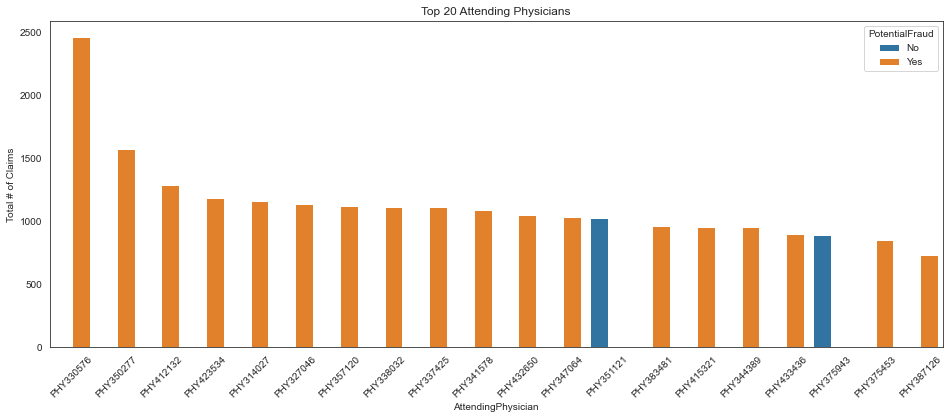

In [53]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.AttendingPhysician.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Attending Physicians")

## change to vertical barplot for visual

Text(0.5, 1.0, 'Top 20 Providers')

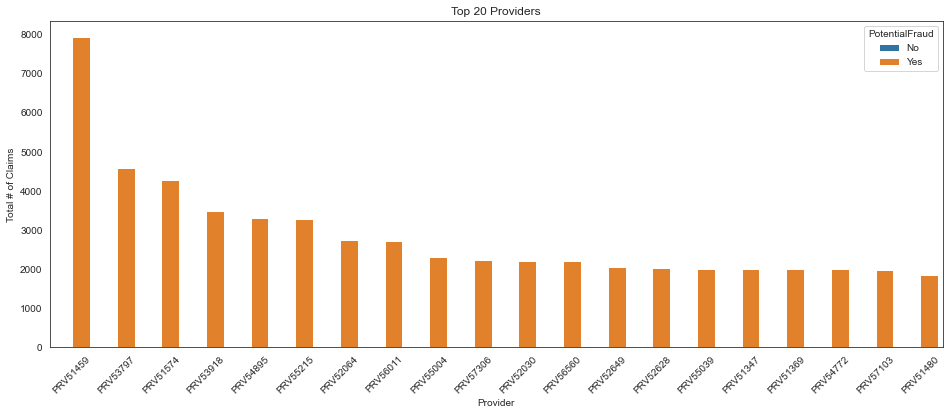

In [54]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider', hue = 'PotentialFraud', data=Train_ProviderWithPatientDetails
              ,order=Train_ProviderWithPatientDetails.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Providers")

In [55]:
Train_Fraud = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'Yes']
Train_Valid = Train_ProviderWithPatientDetails.loc[Train_ProviderWithPatientDetails['PotentialFraud'] == 'No']

Text(0.5, 1.0, 'Top 20 Potential Fraud Providers')

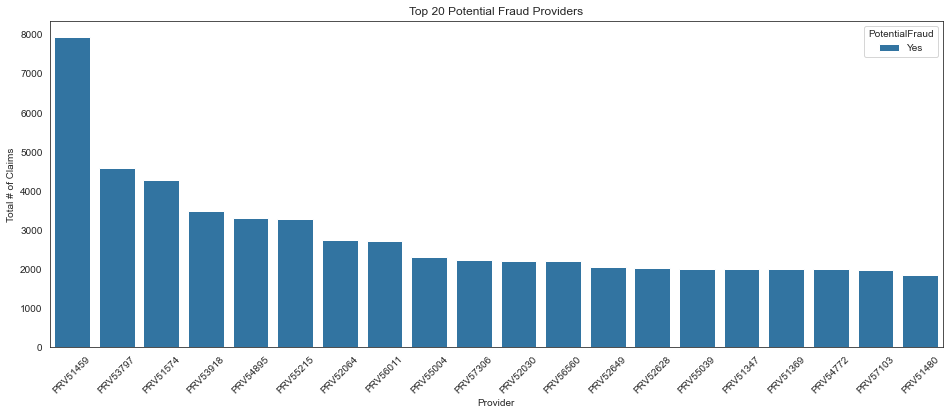

In [56]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',hue='PotentialFraud',data=Train_Fraud
              ,order=Train_Fraud.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Potential Fraud Providers")

Text(0.5, 1.0, 'Top 20 Non-Fraud Providers')

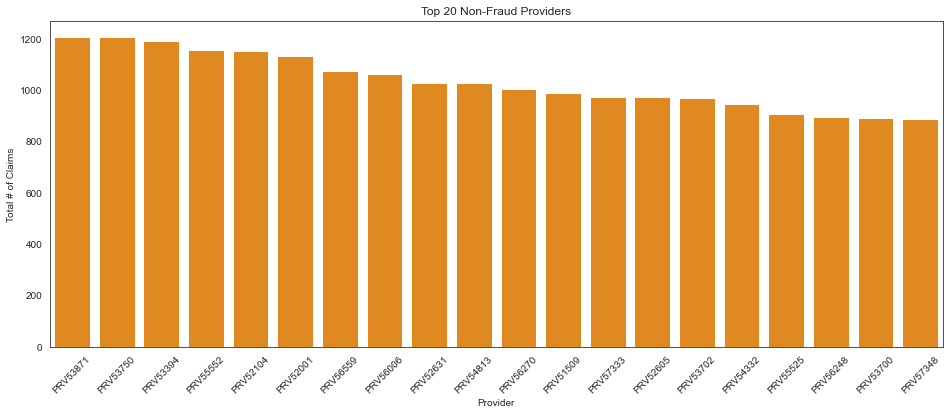

In [57]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='Provider',data=Train_Valid, color = 'darkorange'
              ,order=Train_Valid.Provider.value_counts().iloc[:20].index)
plt.ylabel('Total # of Claims')
plt.xticks(rotation=45)
plt.title("Top 20 Non-Fraud Providers")

In [58]:
Train_ProviderWithPatientDetails.shape

(533659, 59)

C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


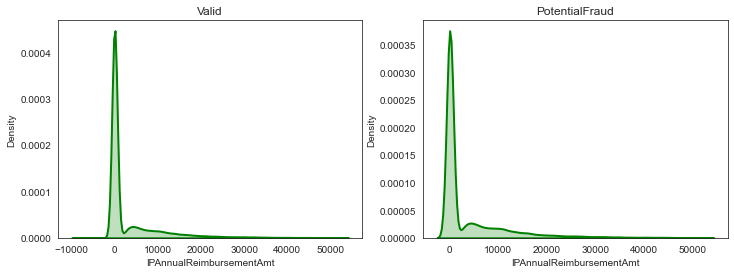

In [59]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['IPAnnualReimbursementAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid') 
sns.distplot(Train_Fraud['IPAnnualReimbursementAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')  
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualReimbursementAmt'>

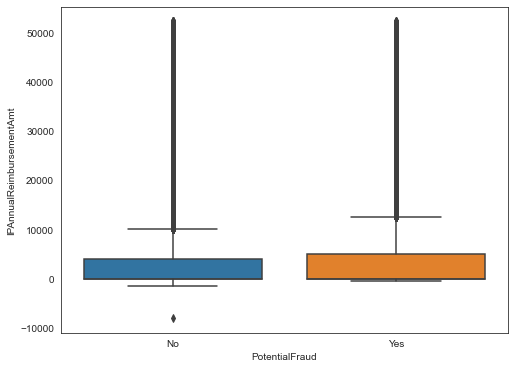

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='IPAnnualReimbursementAmt', data=Train_ProviderWithPatientDetails)

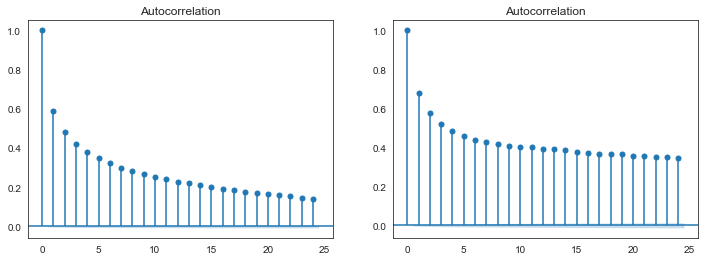

In [61]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['IPAnnualReimbursementAmt'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['IPAnnualReimbursementAmt'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualReimbursementAmt'>

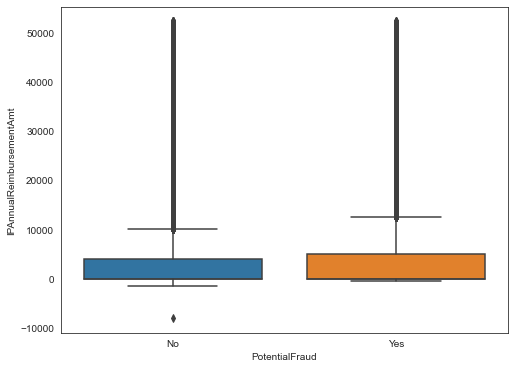

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='IPAnnualReimbursementAmt', data=Train_ProviderWithPatientDetails)

In [63]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(Train_Fraud['IPAnnualReimbursementAmt'], Train_Valid['IPAnnualReimbursementAmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha: print('There is no significant difference between the two populations by IPAnnualReimbursementAmt (fail to reject H0)')
else: print('There is a significant difference between the two populations by IPAnnualReimbursementAmt (reject H0)')

Statistics=32284685420.000, p=0.000
There is a significant difference between the two populations by IPAnnualReimbursementAmt (reject H0)


C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


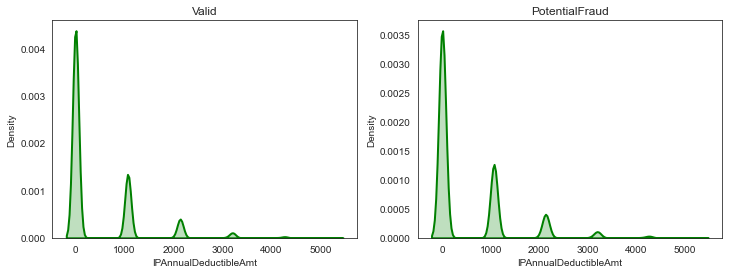

In [64]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['IPAnnualDeductibleAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]).set_title('Valid') 
sns.distplot(Train_Fraud['IPAnnualDeductibleAmt'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]).set_title('PotentialFraud') 
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='IPAnnualDeductibleAmt'>

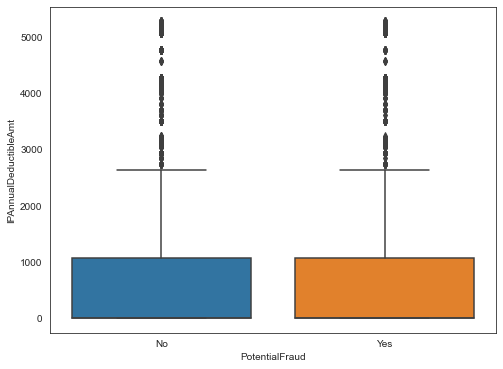

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='IPAnnualDeductibleAmt', data=Train_ProviderWithPatientDetails)

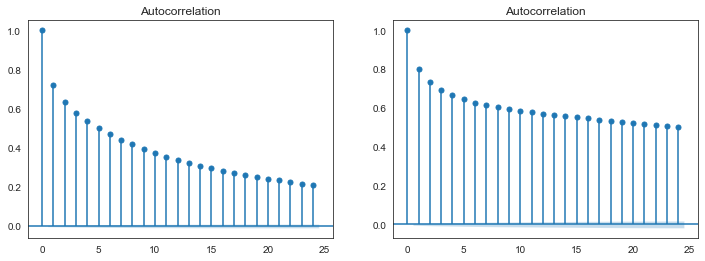

In [66]:
# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['IPAnnualDeductibleAmt'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['IPAnnualDeductibleAmt'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [67]:
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(Train_Fraud['IPAnnualDeductibleAmt'], Train_Valid['IPAnnualDeductibleAmt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha: print('There is no significant difference between the two populations by IPAnnualDeductibleAmt (fail to reject H0)')
else: print('There is a significant difference between the two populations by IPAnnualDeductibleAmt(reject H0)')

Statistics=32201767290.500, p=0.000
There is a significant difference between the two populations by IPAnnualDeductibleAmt(reject H0)


C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


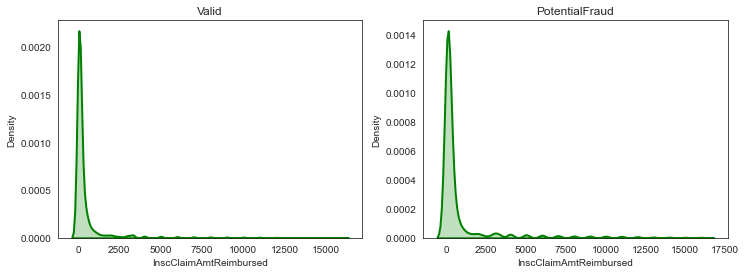

In [68]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['InscClaimAmtReimbursed'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid')
sns.distplot(Train_Fraud['InscClaimAmtReimbursed'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='InscClaimAmtReimbursed'>

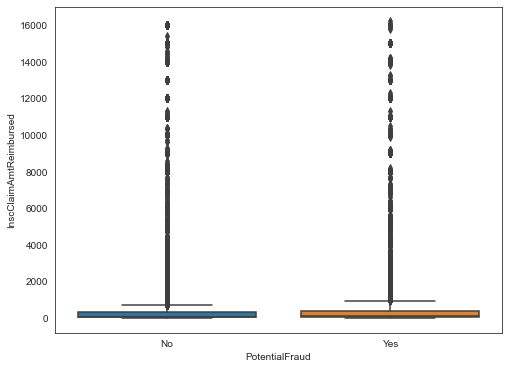

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Train_ProviderWithPatientDetails)

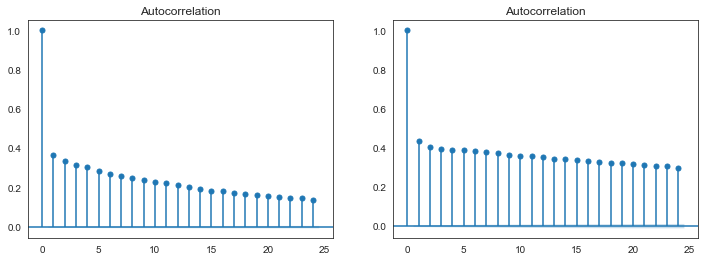

In [70]:
#Auto-correlation
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['InscClaimAmtReimbursed'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['InscClaimAmtReimbursed'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [71]:
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(Train_Fraud['InscClaimAmtReimbursed'], Train_Valid['InscClaimAmtReimbursed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha: print('There is no significant difference between the two populations by InscClaimAmtReimbursed (fail to reject H0)')
else: print('There is a significant difference between the two populations by InscClaimAmtReimbursed (reject H0)')

Statistics=31875853149.500, p=0.000
There is a significant difference between the two populations by InscClaimAmtReimbursed (reject H0)


C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\teren\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


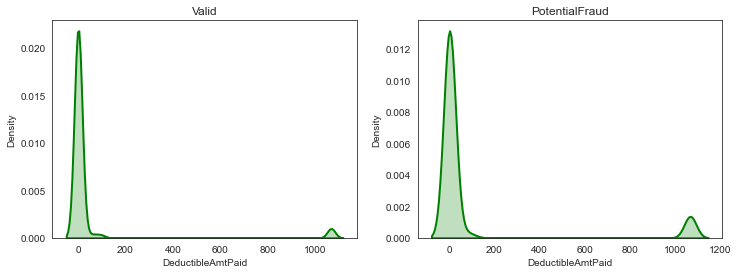

In [72]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(Train_Valid['DeductibleAmtPaid'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[0]).set_title('Valid')
sns.distplot(Train_Fraud['DeductibleAmtPaid'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[1]).set_title('PotentialFraud')
fig.set_figheight(4) 
fig.set_figwidth(12) 

<AxesSubplot:xlabel='PotentialFraud', ylabel='DeductibleAmtPaid'>

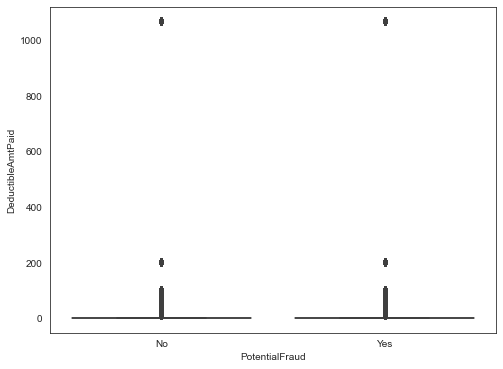

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PotentialFraud',y='DeductibleAmtPaid', data=Train_ProviderWithPatientDetails)

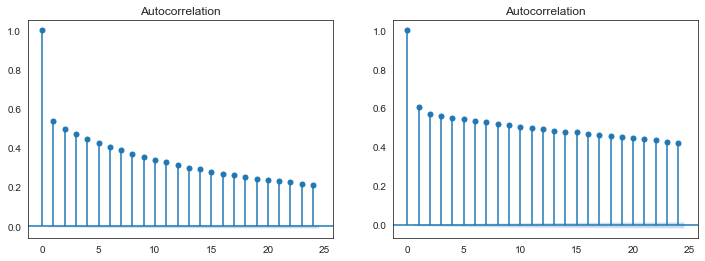

In [74]:
# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(1, 2) 
tsaplots.plot_acf(Train_Valid['DeductibleAmtPaid'], lags=24, ax = ax[0])
tsaplots.plot_acf(Train_Fraud['DeductibleAmtPaid'], lags=24, ax = ax[1])
fig.set_figheight(4) 
fig.set_figwidth(12) 

In [75]:
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(Train_Fraud['DeductibleAmtPaid'], Train_Valid['DeductibleAmtPaid'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha: print('There is no significant difference between the two populations by DeductibleAmtPaid (fail to reject H0)')
else: print('There is a significant difference between the two populations by DeductibleAmtPaid (reject H0)')

Statistics=31822664205.000, p=0.000
There is a significant difference between the two populations by DeductibleAmtPaid (reject H0)


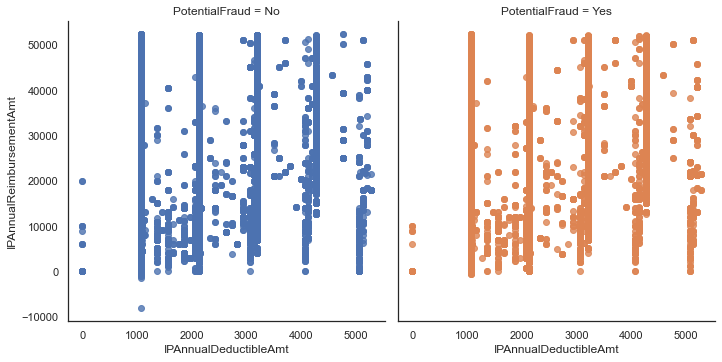

In [76]:
## Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(16,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetails)

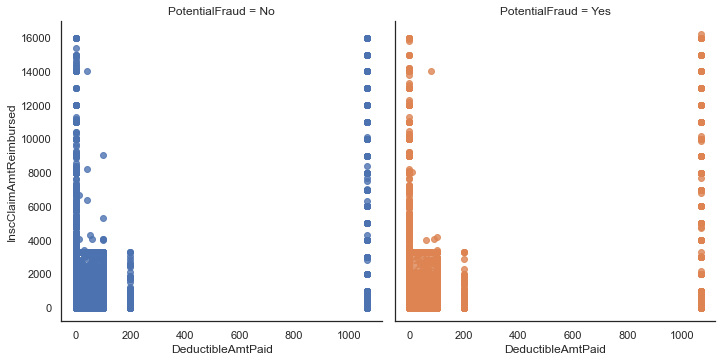

In [77]:
## Plot DeductibleAmtPaid and InsClaimAmtReimbursed in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetails)

In [78]:
#Replace the PotentialFraud values Yes = 1 and No = 0
Train_ProviderWithPatientDetails.PotentialFraud.replace(['Yes','No'],[1,0],inplace=True)

In [79]:
Train_ProviderWithPatientDetails.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'AdmitForDays',
       'PatientType', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_Obstr

In [80]:
#create dummy vairables for machine learning analysis
Train_Race_dummy = pd.get_dummies(Train_ProviderWithPatientDetails['Race']).add_prefix('Race-')
Test_Race_dummy = pd.get_dummies(Test_ProviderWithPatientDetails['Race']).add_prefix('Race-')

In [81]:
Train_Race_dummy.head(2)

,Race-1,Race-2,Race-3,Race-5
0,1,0,0,0
3,1,0,0,0


In [82]:
Test_Race_dummy.head(2)

,Race-1,Race-2,Race-3,Race-5
0,1,0,0,0
1,1,0,0,0


In [83]:
Train_ProviderWithPatientDetails = pd.concat([Train_ProviderWithPatientDetails, Train_Race_dummy], axis = 1)
Test_ProviderWithPatientDetails = pd.concat([Test_ProviderWithPatientDetails, Test_Race_dummy], axis = 1)

In [84]:
Train_Gender_dummy = pd.get_dummies(Train_ProviderWithPatientDetails['Gender']).add_prefix('Gender-')
Test_Gender_dummy = pd.get_dummies(Test_ProviderWithPatientDetails['Gender']).add_prefix('Gender-')

In [85]:
Train_Gender_dummy.head(2)

,Gender-1,Gender-2
0,1,0
3,1,0


In [86]:
Test_Gender_dummy.head(2)

,Gender-1,Gender-2
0,0,1
1,0,1


In [87]:
Train_ProviderWithPatientDetails = pd.concat([Train_ProviderWithPatientDetails, Train_Gender_dummy], axis = 1)
Test_ProviderWithPatientDetails = pd.concat([Test_ProviderWithPatientDetails, Test_Gender_dummy], axis = 1)

In [88]:
Train_Provider_Details = Train_ProviderWithPatientDetails[['Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'PatientType', 'Dead',
                                      'Race-1', 'Race-2', 'Race-3', 'Race-5', 'Gender-1', 'Gender-2', 'Provider', 'PotentialFraud']]
Test_Provider_Details = Test_ProviderWithPatientDetails[['Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'PatientType', 'Dead',
                                      'Race-1', 'Race-2', 'Race-3', 'Race-5', 'Gender-1', 'Gender-2', 'Provider']]

In [89]:
Train_Provider_Summary = Train_Provider_Details.groupby(['Provider', 'PotentialFraud'], as_index = False).agg({'Age': 'median', 
                                      'AdmitForDays': 'median', 'IPAnnualReimbursementAmt': 'median', 'IPAnnualDeductibleAmt': 'median' ,
                                      'DeductibleAmtPaid': 'median','OPAnnualReimbursementAmt': 'median', 'OPAnnualDeductibleAmt': 'median',
                                      'NoOfMonths_PartACov': 'median', 'NoOfMonths_PartBCov': 'median', 'InscClaimAmtReimbursed': 'median',
                                      'ChronicCond_Alzheimer': 'median', 'ChronicCond_Heartfailure': 'median', 'ChronicCond_KidneyDisease': 'median',
                                      'ChronicCond_Cancer': 'median', 'ChronicCond_ObstrPulmonary': 'median', 'ChronicCond_Depression': 'median', 
                                      'ChronicCond_Diabetes': 'median','ChronicCond_IschemicHeart': 'median', 'ChronicCond_Osteoporasis': 'median',
                                      'ChronicCond_rheumatoidarthritis': 'median', 'ChronicCond_stroke': 'median', 'PatientType': 'sum', 'Dead': 'sum',
                                      'Race-1': 'sum', 'Race-2': 'sum', 'Race-3': 'sum', 'Race-5': 'sum', 'Gender-1': 'sum', 'Gender-2': 'sum'})
Test_Provider_Summary = Test_Provider_Details.groupby(['Provider'], as_index = False).agg({'Age': 'median', 
                                      'AdmitForDays': 'median', 'IPAnnualReimbursementAmt': 'median', 'IPAnnualDeductibleAmt': 'median' ,
                                      'DeductibleAmtPaid': 'median','OPAnnualReimbursementAmt': 'median', 'OPAnnualDeductibleAmt': 'median',
                                      'NoOfMonths_PartACov': 'median', 'NoOfMonths_PartBCov': 'median', 'InscClaimAmtReimbursed': 'median',
                                      'ChronicCond_Alzheimer': 'median', 'ChronicCond_Heartfailure': 'median', 'ChronicCond_KidneyDisease': 'median',
                                      'ChronicCond_Cancer': 'median', 'ChronicCond_ObstrPulmonary': 'median', 'ChronicCond_Depression': 'median', 
                                      'ChronicCond_Diabetes': 'median','ChronicCond_IschemicHeart': 'median', 'ChronicCond_Osteoporasis': 'median',
                                      'ChronicCond_rheumatoidarthritis': 'median', 'ChronicCond_stroke': 'median', 'PatientType': 'sum', 'Dead': 'sum',
                                      'Race-1': 'sum', 'Race-2': 'sum', 'Race-3': 'sum', 'Race-5': 'sum', 'Gender-1': 'sum', 'Gender-2': 'sum'})

In [90]:
Train_Provider_Summary.head(2)

,Provider,PotentialFraud,Age,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,InscClaimAmtReimbursed,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PatientType,Dead,Race-1,Race-2,Race-3,Race-5,Gender-1,Gender-2
0,PRV51001,0,80.0,0.0,0,0,0.0,1590,200,12,12.0,200,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1,0.0,17.0,4.0,0.0,0.0,7.0,14.0
1,PRV51003,1,72.0,0.0,4000,1068,0.0,1230,210,12,12.0,1200,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,55,1.0,100.0,22.0,0.0,1.0,50.0,73.0


In [91]:
Train_Provider_Summary.shape

(5393, 31)

In [92]:
Test_Provider_Summary.shape

(1348, 30)

In [93]:
x = Train_Provider_Summary[['Age', 'AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'InscClaimAmtReimbursed',
                                      'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                      'ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'PatientType', 'Dead',
                                      'Race-1', 'Race-2', 'Race-3', 'Race-5', 'Gender-1', 'Gender-2']]

In [94]:
# the independent variables set 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
pd.set_option('display.max_rows', 100)
vif_data

C:\Users\teren\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Age,208.109022
1,AdmitForDays,4.934614
2,IPAnnualReimbursementAmt,5.339896
3,IPAnnualDeductibleAmt,5.606054
4,DeductibleAmtPaid,8.589603
5,OPAnnualReimbursementAmt,6.183663
6,OPAnnualDeductibleAmt,5.910057
7,NoOfMonths_PartACov,1119.743788
8,NoOfMonths_PartBCov,1318.906034
9,InscClaimAmtReimbursed,7.949735


In [95]:
vif_data.loc[vif_data['VIF'] <= 10]

#These are the variables that are of the most importance to the model. 
#We will only include these variables for modeling.

,feature,VIF
1,AdmitForDays,4.934614
2,IPAnnualReimbursementAmt,5.339896
3,IPAnnualDeductibleAmt,5.606054
4,DeductibleAmtPaid,8.589603
5,OPAnnualReimbursementAmt,6.183663
6,OPAnnualDeductibleAmt,5.910057
9,InscClaimAmtReimbursed,7.949735
21,PatientType,1.431095
22,Dead,3.848017


In [96]:
x = Train_Provider_Summary[['AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'InscClaimAmtReimbursed', 'PatientType', 'Dead']]
y = Train_Provider_Summary[['PotentialFraud']]

In [97]:
x_test = Test_Provider_Summary[['AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'InscClaimAmtReimbursed', 'PatientType', 'Dead']]

In [98]:
x_test.isnull().sum()

AdmitForDays                0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
DeductibleAmtPaid           0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
InscClaimAmtReimbursed      0
PatientType                 0
Dead                        0
dtype: int64

In [99]:
Train_Provider_Summary[['AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'InscClaimAmtReimbursed', 'PatientType', 'Dead']]

,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,PatientType,Dead
0,0.0,0,0,0.0,1590,200,200,1,0.0
1,0.0,4000,1068,0.0,1230,210,1200,55,1.0
2,0.0,0,0,0.0,1140,380,70,0,1.0
3,0.0,0,0,0.0,1175,340,70,0,4.0
4,0.0,0,0,0.0,1290,240,80,3,1.0
...,...,...,...,...,...,...,...,...,...
5388,0.0,0,0,0.0,1525,510,65,0,0.0
5389,0.0,0,0,0.0,680,620,85,0,0.0
5390,0.0,0,0,0.0,1300,330,70,0,1.0
5391,0.0,15000,1068,0.0,2540,400,1900,0,0.0


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val= train_test_split(x,y, test_size=0.2499, random_state=42)

In [101]:
x_train.shape

(4045, 9)

In [102]:
x_val.shape

(1348, 9)

[21:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\teren\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

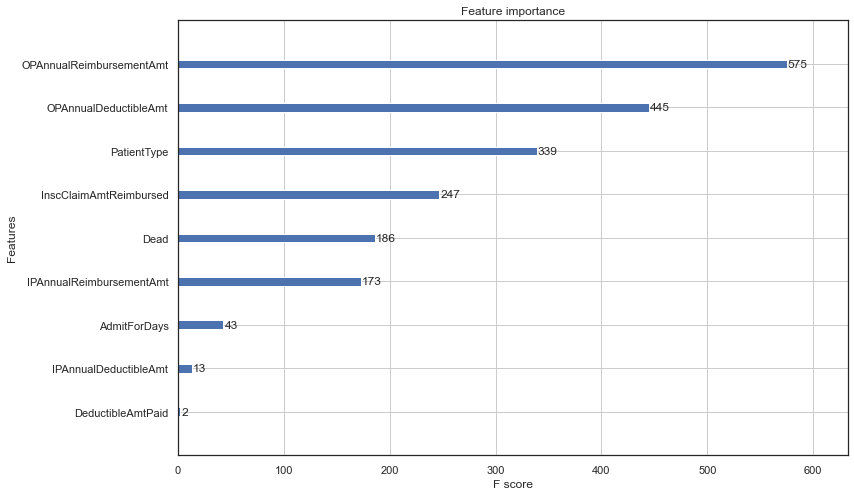

In [103]:
#XGBoost
from xgboost import plot_importance
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
plot_importance(xgb)

In [104]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
xgb_model_score = xgb.predict(x_train)
xgb_pred = xgb.predict(x_val)

[21:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_val, xgb_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, xgb_pred))
print("Recall Score: %.3f " % recall_score(y_val, xgb_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, xgb_pred))

[[1196   32]
 [  71   49]]
Precision Score:  0.605 
Recall Score: 0.408 
Accuracy: 0.924 


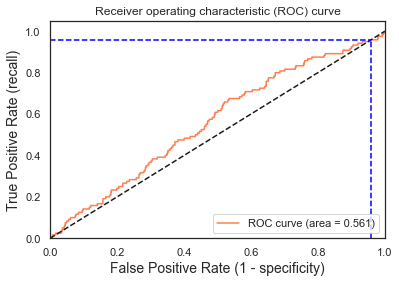

Using a threshold of 0.000 guarantees a sensitivity of 0.958 and a specificity of 0.042, i.e. a false positive rate of 95.77%.


In [106]:
#XGBoost
from sklearn.metrics import roc_curve, auc
[fpr, tpr, thr] = roc_curve(y_val, xgb.predict_proba(x_test)[:,1])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

<ipython-input-107-1bae3d912569>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy Score:  0.9024997865296303


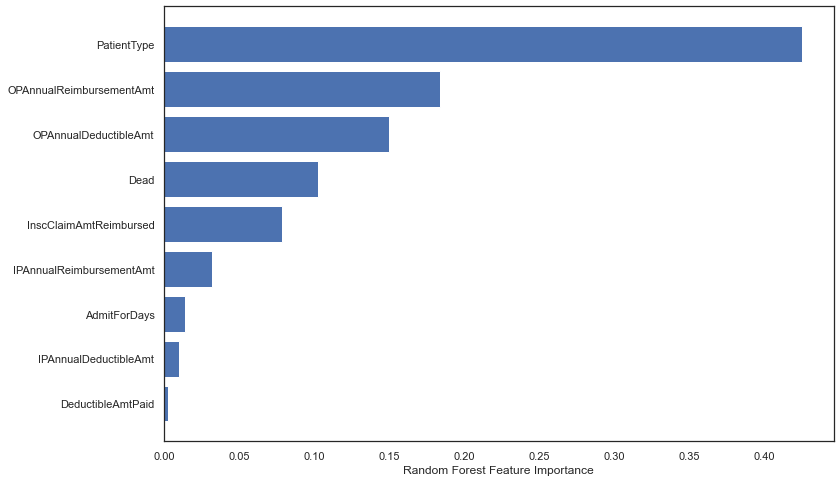

In [107]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
print('Accuracy Score: ', rf.score(x_train, y_train))

In [108]:
#Random Forest Regressor
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
rf_model_score= rf.predict(x_train)
rf_pred= rf.predict(x_val)

<ipython-input-108-fdce924ede6e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [109]:
cm = confusion_matrix(y_val, rf_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, rf_pred))
print("Recall Score: %.3f " % recall_score(y_val, rf_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, rf_pred))

[[1200   28]
 [  69   51]]
Precision Score:  0.646 
Recall Score: 0.425 
Accuracy: 0.928 


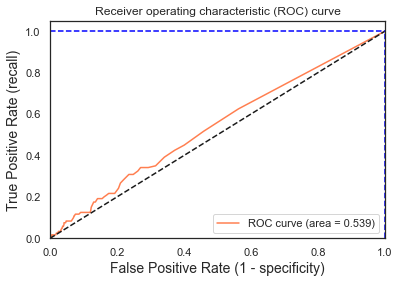

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [110]:
[fpr, tpr, thr] = roc_curve(y_val, rf.predict_proba(x_test)[:,1])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [111]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_model_score= lr.predict(x_train)
lr_pred= lr.predict(x_val)

C:\Users\teren\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
cm = confusion_matrix(y_val,lr_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, lr_pred))
print("Recall Score: %.3f " % recall_score(y_val, lr_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, lr_pred))

[[1202   26]
 [  71   49]]
Precision Score:  0.653 
Recall Score: 0.408 
Accuracy: 0.928 


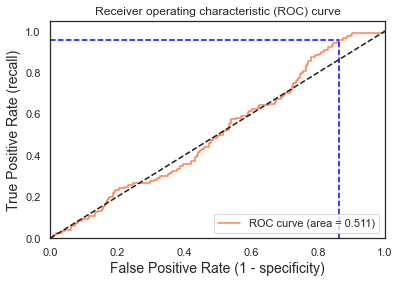

Using a threshold of 0.008 guarantees a sensitivity of 0.958 and a specificity of 0.138, i.e. a false positive rate of 86.16%.


In [113]:
[fpr, tpr, thr] = roc_curve(y_val, lr.predict_proba(x_test)[:,1])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [114]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split= 2)
fig = dt.fit(x_train, y_train)
dt_model_score= dt.predict(x_train)
dt_pred= dt.predict(x_test)

In [115]:
cm = confusion_matrix(y_val,dt_pred)
print(cm)

print("Precision Score:  %.3f " % precision_score(y_val, dt_pred))
print("Recall Score: %.3f " % recall_score(y_val, dt_pred))
print("Accuracy: %.3f " % accuracy_score(y_val, dt_pred))

[[1181   47]
 [ 113    7]]
Precision Score:  0.130 
Recall Score: 0.058 
Accuracy: 0.881 


In [116]:
#from sklearn import tree
#plt.figure(figsize=(16,16))
#tree.plot_tree(fig, fontsize=8, feature_names=x_train.columns)
#plt.show()

In [117]:
acc_score =[]
#XGBoost Results
acc_score.append({'Model':'XG boost', 
                  'Score': accuracy_score(y_train, xgb_model_score), 
                  'Precision': precision_score(y_val, xgb_pred),
                  'Recall': recall_score(y_val, xgb_pred),
                  'F1 Score': f1_score(y_val,xgb_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, xgb_pred)})
#Random Forest Results
acc_score.append({'Model':'Random Forest', 
                  'Score': accuracy_score(y_train, rf_model_score), 
                  'Precision': precision_score(y_val, rf_pred),
                  'Recall': recall_score(y_val, rf_pred), 
                  'F1 Score': f1_score(y_val,rf_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, rf_pred)})
#Logistic Regrsssion Results
acc_score.append({'Model':'Logistic Regression', 
                  'Score': accuracy_score(y_train, lr_model_score), 
                  'Precision': precision_score(y_val, lr_pred),
                  'Recall': recall_score(y_val, lr_pred), 
                  'F1 Score': f1_score(y_val,lr_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, lr_pred)})
#Decision Tree Rsults
acc_score.append({'Model':'Decision Tree', 
                  'Score': accuracy_score(y_train, dt_model_score), 
                  'Precision': precision_score(y_val, dt_pred),
                  'Recall': recall_score(y_val, dt_pred), 
                  'F1 Score': f1_score(y_val,dt_pred, average='weighted'),
                  'Accuracy': accuracy_score(y_val, dt_pred)})

In [118]:
acc_score = pd.DataFrame(acc_score, columns=['Model','Score','Precision', 'Recall', 'F1 Score' ,'Accuracy'])
acc_score.sort_values(by='Accuracy', ascending= False)

,Model,Score,Precision,Recall,F1 Score,Accuracy
1,Random Forest,1.000000,0.645570,0.425000,0.921220,0.928042
2,Logistic Regression,0.927070,0.653333,0.408333,0.920386,0.928042
0,XG boost,0.985909,0.604938,0.408333,0.916775,0.923591
3,Decision Tree,0.936218,0.129630,0.058333,0.860348,0.881306


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

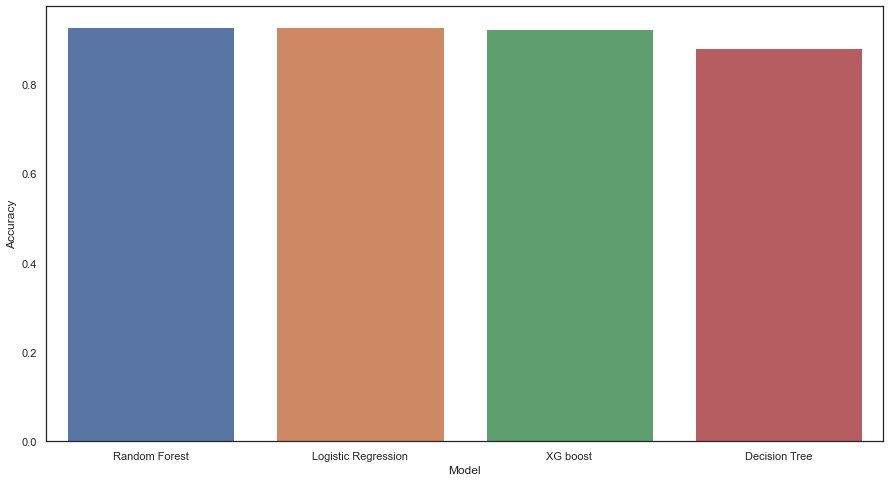

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'Model', y='Accuracy', data = acc_score, order=acc_score.sort_values('Accuracy',ascending = False).Model)

In [120]:
Test_ProviderPrediction = Test_Provider_Summary[['AdmitForDays', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt' ,
                                      'DeductibleAmtPaid','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                                      'InscClaimAmtReimbursed', 'PatientType', 'Dead']]

In [121]:
Test_ProviderPrediction.head(2)

,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,PatientType,Dead
0,0.0,0,0,0.0,1430,340,80,0,3.0
1,0.0,0,0,0.0,1350,230,80,0,0.0


In [122]:
Test_ProviderPrediction['PotentialFraudPred'] = xgb.predict(Test_ProviderPrediction)

<ipython-input-122-6e78bbfa98d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_ProviderPrediction['PotentialFraudPred'] = xgb.predict(Test_ProviderPrediction)


In [123]:
Test_ProviderPred = pd.merge(Test, Test_ProviderPrediction, how='inner', right_index = True, left_index = True)

In [124]:
Test_ProviderPred.loc[Test_ProviderPred['PotentialFraudPred'] == 1]

,Provider,AdmitForDays,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,DeductibleAmtPaid,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,PatientType,Dead,PotentialFraudPred
13,PRV51051,0.0,0,0,0.0,1190,320,80,6,9.0,1
15,PRV51073,2.0,7080,1068,1068.0,1830,290,3000,71,1.0,1
85,PRV51402,4.0,7700,1068,1068.0,825,265,5000,229,2.0,1
112,PRV51543,0.0,0,0,0.0,880,320,200,19,1.0,1
168,PRV51850,0.0,3000,1068,0.0,720,210,300,43,1.0,1
188,PRV51975,2.0,4210,1068,1068.0,860,245,2000,86,1.0,1
201,PRV52033,0.0,0,0,0.0,1650,430,90,22,0.0,1
210,PRV52067,0.0,5380,1068,0.0,980,265,1150,87,1.0,1
211,PRV52070,0.0,0,0,0.0,1270,370,80,0,12.0,1
221,PRV52108,0.0,0,0,0.0,960,365,90,14,0.0,1


In [125]:
Test_ProviderPred.groupby(['PotentialFraudPred']).size()

PotentialFraudPred
0    1268
1      80
dtype: int64